In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Read in dataset and select fields for model
dataset = pd.read_csv('modified_dataset.csv')
dataset.head()


,cveID,dateAdded,vendorProject,product,datePublished,CVSS v2,CVSS v3.1,days
0,CVE-2021-0920,2022-05-23,Android,Kernel,2021-12-15,6.9,6.4,159.0
1,CVE-2021-1048,2022-05-23,Android,Kernel,2021-12-15,7.2,7.8,159.0
2,CVE-2021-1789,2022-05-04,Apple,Multiple Products,2021-04-02,6.8,8.8,397.0
3,CVE-2021-20028,2022-03-28,SonicWall,Secure Remote Access (SRA),2021-08-04,7.5,9.8,236.0
4,CVE-2021-20038,2022-01-28,SonicWall,SMA 100 Appliances,2021-12-08,7.5,9.8,51.0


In [4]:
# data = dataset[['dateAdded', 'days']]
data = dataset[['CVSS v3.1', 'days']]
data.shape

(127, 2)

In [5]:
# Check for any missing values.
data.isna().sum()

CVSS v3.1    0
days         0
dtype: int64

In [6]:
# Correlation matrix
corr = data.corr()
corr['days'].sort_values(ascending=False)

days         1.000000
CVSS v3.1   -0.278082
Name: days, dtype: float64

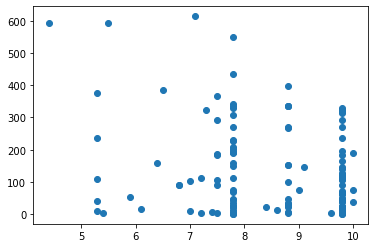

In [586]:
# Set X and y to the appropriate fields
X = data['CVSS v3.1']
y = data['days']

# View data
plt.scatter(X, y)

In [587]:
from sklearn.model_selection import train_test_split

# Split data into train and test data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [588]:
import numpy as np

# Convert data to 2-dimensional data using numpy
x_train = np.array(x_train).reshape(-1, 1)
x_test = np.array(x_test).reshape(-1, 1)

In [589]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [590]:
# Train the model
y_pred_train = lin_reg.predict(x_train)

Text(0, 0.5, 'Number of days')

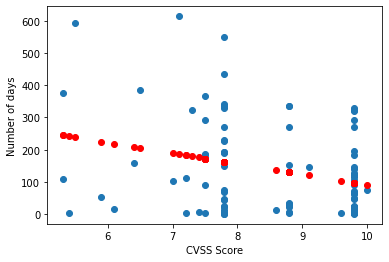

In [591]:
plt.scatter(x_train, y_train)
plt.scatter(x_train, y_pred_train, color='red')
plt.xlabel('CVSS Score')
plt.ylabel('Number of days')

In [592]:
y_pred_test = lin_reg.predict(x_test)
y_pred_test

array([ 90.96975377, 162.99833546, 162.99833546,  97.51780665,
       195.73859987, 189.19054699, 162.99833546,  97.51780665,
       244.84899648,  97.51780665, 130.25807106, 143.35417682,
        97.51780665,  97.51780665,  97.51780665, 162.99833546,
        97.51780665, 130.25807106, 162.99833546, 162.99833546,
        97.51780665, 162.99833546, 123.71001817,  97.51780665,
       162.99833546, 130.25807106, 274.31523445, 130.25807106,
       130.25807106, 244.84899648, 244.84899648,  97.51780665,
        97.51780665,  97.51780665, 130.25807106, 172.82041479,
       195.73859987,  90.96975377,  97.51780665])

Text(0, 0.5, 'Number of days')

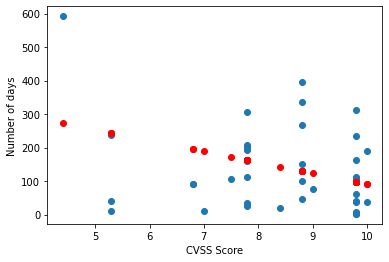

In [593]:
plt.scatter(x_test, y_test)
plt.scatter(x_test, y_pred_test, color='red')
plt.xlabel('CVSS Score')
plt.ylabel('Number of days')

In [595]:
# Calculate RMSE
from sklearn.metrics import mean_squared_error
days_pred = lin_reg.predict(x_train)
lin_mse = mean_squared_error(y_train, days_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

141.4175782281126

In [596]:
# Calculate RMSE
from sklearn.metrics import mean_squared_error
days_pred_test = lin_reg.predict(x_test)
lin_mse_test = mean_squared_error(y_test, days_pred_test)
lin_rmse_test = np.sqrt(lin_mse_test)
lin_rmse_test

125.29744406710525

In [626]:
from sklearn.svm import LinearSVR
svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(x_train, y_train)

LinearSVR(epsilon=1.5)

In [627]:
# Train the model
y_pred_train1 = svm_reg.predict(x_train)

Text(0, 0.5, 'Number of days')

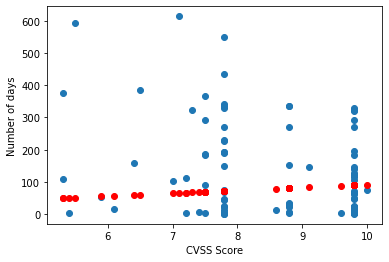

In [628]:
plt.scatter(x_train, y_train)
plt.scatter(x_train, y_pred_train1, color='red')
plt.xlabel('CVSS Score')
plt.ylabel('Number of days')

In [629]:
y_pred_test1 = svm_reg.predict(x_test)
y_pred_test1

array([91.2493817 , 72.00618302, 72.00618302, 89.5       , 63.25927453,
       65.00865622, 72.00618302, 89.5       , 50.13891179, 89.5       ,
       80.75309151, 77.25432811, 89.5       , 89.5       , 89.5       ,
       72.00618302, 89.5       , 80.75309151, 72.00618302, 72.00618302,
       89.5       , 72.00618302, 82.50247321, 89.5       , 72.00618302,
       80.75309151, 42.26669415, 80.75309151, 80.75309151, 50.13891179,
       50.13891179, 89.5       , 89.5       , 89.5       , 80.75309151,
       69.38211047, 63.25927453, 91.2493817 , 89.5       ])

Text(0, 0.5, 'Number of days')

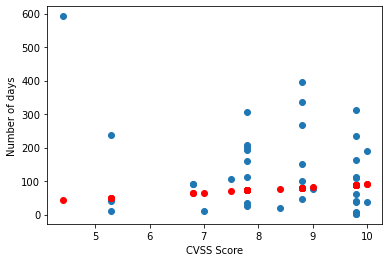

In [630]:
plt.scatter(x_test, y_test)
plt.scatter(x_test, y_pred_test1, color='red')
plt.xlabel('CVSS Score')
plt.ylabel('Number of days')

In [631]:
# Calculate RMSE
from sklearn.metrics import mean_squared_error
days_pred1 = svm_reg.predict(x_train)
svm_mse = mean_squared_error(y_train, days_pred1)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

163.88697802797594

In [632]:
# Calculate RMSE
from sklearn.metrics import mean_squared_error
days_pred1_test = svm_reg.predict(x_test)
svm_mse_test = mean_squared_error(y_test, days_pred1_test)
svm_rmse_test = np.sqrt(svm_mse_test)
svm_rmse_test

143.77603941678095

In [604]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=4)
tree_reg.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=4)

In [605]:
# Train the model
y_pred_train2 = tree_reg.predict(x_train)

Text(0, 0.5, 'Number of days')

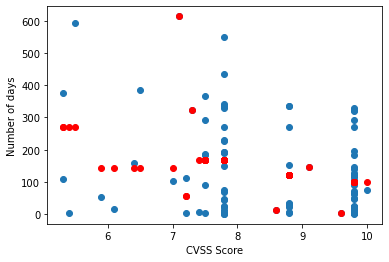

In [606]:
plt.scatter(x_train, y_train)
plt.scatter(x_train, y_pred_train2, color='red')
plt.xlabel('CVSS Score')
plt.ylabel('Number of days')

In [607]:
y_pred_test2 = tree_reg.predict(x_test)
y_pred_test2

array([ 99.84848485, 168.5862069 , 168.5862069 ,  99.84848485,
       143.2       , 143.2       , 168.5862069 ,  99.84848485,
       270.5       ,  99.84848485, 122.6       ,  12.        ,
        99.84848485,  99.84848485,  99.84848485, 168.5862069 ,
        99.84848485, 122.6       , 168.5862069 , 168.5862069 ,
        99.84848485, 168.5862069 , 145.        ,  99.84848485,
       168.5862069 , 122.6       , 270.5       , 122.6       ,
       122.6       , 270.5       , 270.5       ,  99.84848485,
        99.84848485,  99.84848485, 122.6       , 168.5862069 ,
       143.2       ,  99.84848485,  99.84848485])

Text(0, 0.5, 'Number of days')

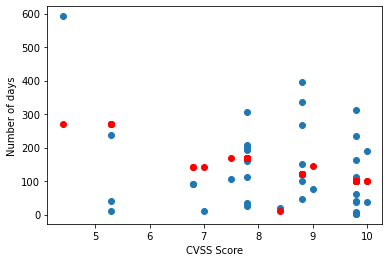

In [608]:
plt.scatter(x_test, y_test)
plt.scatter(x_test, y_pred_test2, color='red')
plt.xlabel('CVSS Score')
plt.ylabel('Number of days')

In [609]:
# Calculate RMSE
from sklearn.metrics import mean_squared_error
days_pred2 = tree_reg.predict(x_train)
tree_mse = mean_squared_error(y_train, days_pred2)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

128.85004836961562

In [610]:
# Calculate RMSE
from sklearn.metrics import mean_squared_error
days_pred2_test = tree_reg.predict(x_test)
tree_mse_test = mean_squared_error(y_test, days_pred2_test)
tree_rmse_test = np.sqrt(tree_mse_test)
tree_rmse_test

124.56894125511647